In [ ]:
1import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Parkinsson disease.csv')

# Check the size of the dataset
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 195
Number of columns: 24


In [ ]:
parkinsons_data = pd.read_csv('/content/Parkinsson disease.csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape


(195, 24)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']
print(X)
print(Y)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def plot_confusion_matrix(model, X_test, Y_test, title):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# SVM Hyperparameter Tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm.SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, Y_train)
print("Best SVM Params:", svm_grid.best_params_)
print("Best SVM CV Score:", svm_grid.best_score_)

# Random Forest Hyperparameter Tuning
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, Y_train)
print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest CV Score:", rf_grid.best_score_)

# KNN Hyperparameter Tuning
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, Y_train)
print("Best KNN Params:", knn_grid.best_params_)
print("Best KNN CV Score:", knn_grid.best_score_)


Best SVM Params: {'C': 10, 'kernel': 'rbf'}
Best SVM CV Score: 0.9038306451612904
Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest CV Score: 0.8973790322580646
Best KNN Params: {'n_neighbors': 3, 'weights': 'uniform'}
Best KNN CV Score: 0.9419354838709678


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for SVM
svm_model = svm.SVC(kernel='linear', C=1)  # Example using optimal parameters from GridSearchCV
svm_cv_scores = cross_val_score(svm_model, X_train, Y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Accuracy: ", np.mean(svm_cv_scores))

# Cross-validation for Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2)
rf_cv_scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy: ", np.mean(rf_cv_scores))

# Cross-validation for KNN
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=5, scoring='accuracy')
print("KNN Cross-Validation Accuracy: ", np.mean(knn_cv_scores))


SVM Cross-Validation Accuracy:  0.8524193548387098
Random Forest Cross-Validation Accuracy:  0.8592741935483872
KNN Cross-Validation Accuracy:  0.903225806451613


In [ ]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm.SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, Y_train)
print("Best SVM Params:", svm_grid.best_params_)
print("Best SVM CV Score:", svm_grid.best_score_)

Best SVM Params: {'C': 10, 'kernel': 'rbf'}
Best SVM CV Score: 0.9038306451612904


Tuned SVM Test Accuracy: 0.8717948717948718


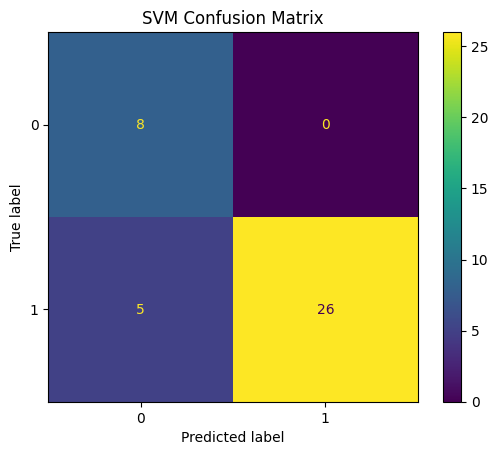

In [ ]:
# Evaluate the best SVM model on the test data
best_svm = svm_grid.best_estimator_
svm_test_accuracy = accuracy_score(Y_test, best_svm.predict(X_test))
print('Tuned SVM Test Accuracy:', svm_test_accuracy)
plot_confusion_matrix(best_svm, X_test, Y_test, "SVM Confusion Matrix")

In [ ]:
# Random Forest Hyperparameter Tuning and Cross-Validation
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, Y_train)
print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest CV Score:", rf_grid.best_score_)

Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest CV Score: 0.8850806451612904


Tuned Random Forest Test Accuracy: 0.8717948717948718


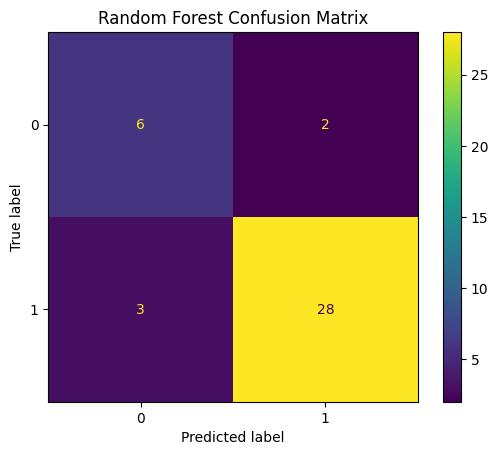

In [ ]:
# Evaluate the best Random Forest model on the test data
best_rf = rf_grid.best_estimator_
rf_test_accuracy = accuracy_score(Y_test, best_rf.predict(X_test))
print('Tuned Random Forest Test Accuracy:', rf_test_accuracy)
plot_confusion_matrix(best_rf, X_test, Y_test, "Random Forest Confusion Matrix")


In [ ]:
# KNN Hyperparameter Tuning and Cross-Validation
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, Y_train)
print("Best KNN Params:", knn_grid.best_params_)
print("Best KNN CV Score:", knn_grid.best_score_)

Best KNN Params: {'n_neighbors': 3, 'weights': 'uniform'}
Best KNN CV Score: 0.9419354838709678


Tuned KNN Test Accuracy: 0.8205128205128205


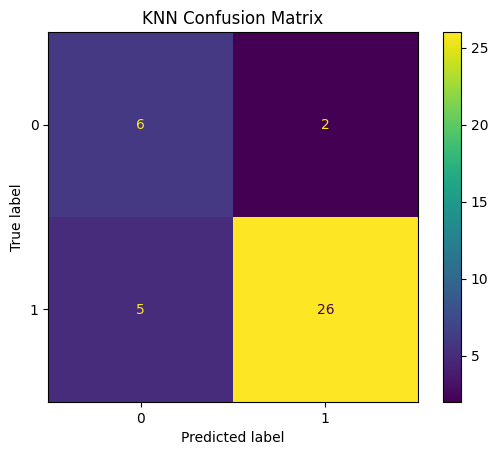

In [ ]:
# Evaluate the best KNN model on the test data
best_knn = knn_grid.best_estimator_
knn_test_accuracy = accuracy_score(Y_test, best_knn.predict(X_test))
print('Tuned KNN Test Accuracy:', knn_test_accuracy)
plot_confusion_matrix(best_knn, X_test, Y_test, "KNN Confusion Matrix")

In [ ]:
### Prediction for a New Patient ###

# Example input data (replace with actual input values)
input_data = (197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 0.00498, 0.01098,
              0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 0.00339, 26.77500, 0.422229, 0.741367,
              -7.348300, 0.177551, 1.743867, 0.085569)

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the data
std_data = scaler.transform(input_data_reshaped)

# Make a prediction using the best SVM model
prediction = best_svm.predict(std_data)

# Output the prediction
if prediction[0] == 0:
    print("The person does NOT have Parkinson's disease.")
else:
    print("The person HAS Parkinson's disease.")


The person does NOT have Parkinson's disease.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
### Visualization of Model Comparison ###
models = ['SVM', 'Random Forest', 'KNN']
test_accuracies = [svm_test_accuracy, rf_test_accuracy, knn_test_accuracy]


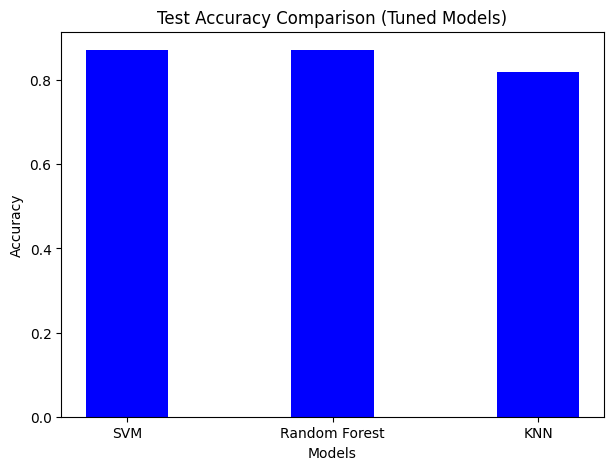

In [ ]:
# Bar graph for accuracy comparison
plt.figure(figsize=(7, 5))
plt.bar(models, test_accuracies, color='blue', width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Comparison (Tuned Models)')
plt.show()


In [ ]:
# Classification Reports
print("SVM Classification Report:\n", classification_report(Y_test, best_svm.predict(X_test)))
print("Random Forest Classification Report:\n", classification_report(Y_test, best_rf.predict(X_test)))
print("KNN Classification Report:\n", classification_report(Y_test, best_knn.predict(X_test)))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.84      0.91        31

    accuracy                           0.87        39
   macro avg       0.81      0.92      0.84        39
weighted avg       0.92      0.87      0.88        39

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.93      0.90      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.88      0.87      0.87        39

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.93      0.84      0.88        31

    accuracy                           0.82        39
   macro avg       0.74      0.79 

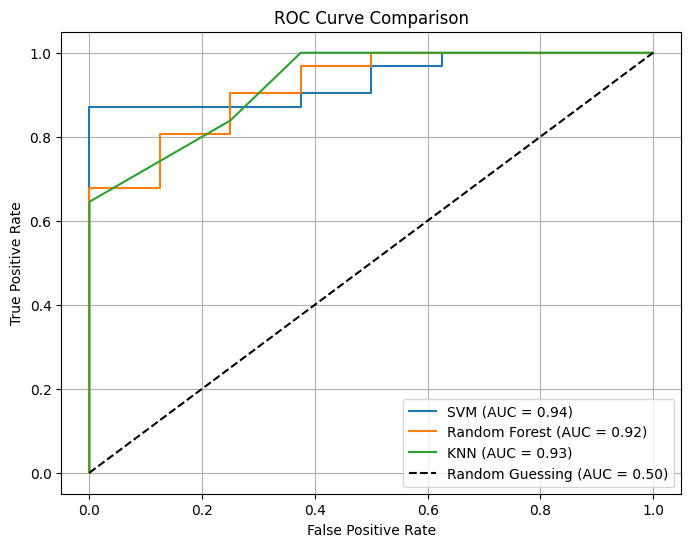

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, Y_test, label):
    """Plots the ROC curve for a given model."""

    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        Y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1
    else:
        # Use decision_function for SVM (if probability=False)
        if hasattr(model, "decision_function"):
            Y_prob = model.decision_function(X_test)
        else:
            raise ValueError(f"Model {label} does not support probability estimation.")

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    auc_score = auc(fpr, tpr)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

# Plot all models
plt.figure(figsize=(8, 6))
plot_roc_curve(best_svm, X_test, Y_test, "SVM")
plot_roc_curve(best_rf, X_test, Y_test, "Random Forest")
plot_roc_curve(best_knn, X_test, Y_test, "KNN")

# Final touches to the plot
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing (AUC = 0.50)")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()
